# Regression Techniques for Predictive Analysis

Following our exploration of classification tasks in machine learning, such as distinguishing between sea ice and open water, we now shift our focus to regression techniques. Regression analysis is pivotal in predictive modeling, allowing us to estimate continuous outcomes. This could include predicting sea ice concentration levels from optical satellite data. We will examine three distinct regression methods, each with its unique advantages and applicability to different types of data:

1. **Polynomial Regression**: An extension of linear regression that models the relationship between the response variable and polynomial features of the predictors. It is particularly useful when the relationship between variables is non-linear.

2. **Neural Networks**: These versatile and powerful models can capture complex patterns in data, making them suitable for a wide range of problems, including those with high-dimensional inputs such as multispectral or hyperspectral imagery.

3. **Gaussian Processes**: A probabilistic approach that provides not only predictions but also a measure of uncertainty, which can be crucial when dealing with sparse or noisy data, as is often the case in remote sensing.

By comparing these methods, we aim to understand their strengths and limitations in the context of geospatial analysis and find the best fit for our specific application in monitoring the polar regions.


## Polynomial Regression {cite}`draper1998applied`

### Introduction to Polynomial Regression

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modeled as an $n$ th degree polynomial. Polynomial regression fits a nonlinear relationship between the value of $x$ and the corresponding conditional mean of $y$, denoted $E(y |x)$.

### Why Polynomial Regression?

Polynomial regression can be used in situations where the relationship between the independent and dependent variables is nonlinear. It can model the curve in the data by adding higher degree terms of an independent variable, which is a straightforward way to model nonlinearity.

### Key Components of Polynomial Regression

1. **Polynomial Terms**: Introduces polynomial terms ($x^2, x^3, \ldots, x^n $) into a linear regression model, capturing the non-linear relationship between $ x $ and $ y $.
2. **Degree of Polynomial**: The degree $ n $ of the polynomial regression determines the flexibility of the model to fit the data. The higher the degree, the more flexible the model.
3. **Model Fitting**: The polynomial regression model is fitted using the method of least squares, which minimizes the sum of the squares of the differences between the observed and predicted values.

### Understanding Polynomial Regression

The model assumes that the relationship between variables can be described as a polynomial of degree $n$:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \epsilon
$$

where:
- $y$ is the response variable.
- $x$ is the predictor variable.
- $\beta_0, \beta_1, \ldots, \beta_n$ are the model coefficients.
- $\epsilon$ is the error term, capturing the deviation from the model.

### Advantages of Polynomial Regression

- **Flexibility**: Can fit a wide range of curvatures in the data.
- **Interpretability**: Coefficients can be easily interpreted as the rate of change in $y$ for a unit change in $x$ when all other predictors are held constant.


### Basic Code Implementation

Below is a simple implementation of polynomial regression using scikit-learn's `PolynomialFeatures` and `LinearRegression` classes. This illustrates how to fit a polynomial regression model to a dataset.



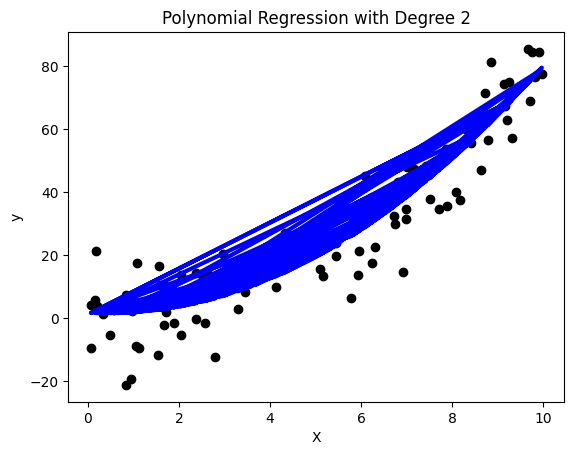

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.random.rand(100, 1) * 10  # Predictor variable
y = 3 - 2 * X + X ** 2 + np.random.randn(100, 1) * 10  # Response variable

# Transforming the data to include polynomial terms
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X)

# Polynomial Regression model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plotting the results
plt.scatter(X, y, color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.title('Polynomial Regression with Degree 2')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Neural Networks {cite}`goodfellow2016deep`

### Introduction to Neural Networks

Neural Networks are a set of algorithms, modeled loosely after the human brain, designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling, or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text, or time series, must be translated.

### Why Neural Networks for Regression and Classification?

Neural networks are particularly effective for:

- **Handling High Dimensionality**: They can manage data with high dimensionality (like images) and extract patterns or features.
- **Flexibility**: Neural networks can be applied to a wide range of tasks, including both regression and classification.

### Key Components of Neural Networks

1. **Layers**: Composed of neurons, layers are the fundamental units of neural networks. A fully connected network consists of input, hidden, and output layers.
2. **Neurons**: Each neuron in a layer is connected to all neurons in the previous and next layers, processing the input data and passing on its output.
3. **Weights and Biases**: These parameters are adjusted during training to minimize the network's error in predicting the target variable.
4. **Activation Functions**: Functions like ReLU or Sigmoid introduce non-linearities, allowing the network to model complex relationships.

### Understanding Fully Connected Neural Networks

Fully connected neural networks consist of dense layers where each neuron in one layer is connected to all neurons in the next layer. The depth (number of layers) and width (number of neurons per layer) can be adjusted to increase the network's capacity.

### Advantages of Neural Networks

- **Adaptability**: They can model complex non-linear relationships.
- **Scalability**: Effective for large datasets and high-dimensional data.

### Basic Code Implementation

Below is a basic example of implementing a neural network using TensorFlow and Keras. This example illustrates a simple network for regression or classification tasks.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Sample data
X = np.random.rand(100, 10)  # 10 feature inputs
y = np.random.rand(100, 1)   # Target variable for regression

# Neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10)

# Use model to predict on new data
y_pred = model.predict(X)

# Example of model summary
model.summary()

# Gaussian Processes


## Mathematical Framework

### Basic Concepts
A Gaussian Process (GP) is essentially an advanced form of a Gaussian (or normal) distribution, but instead of being over simple variables, it's over functions. Imagine a GP as a method to predict or estimate a function based on known data points. 

In mathematical terms, a GP is defined for a set of function values, where these values follow a Gaussian distribution. Specifically, for any selection of points from a set $X$, the values that a function $f$ takes at these points follow a joint Gaussian distribution.

The key to understanding GPs lies in two main concepts:
1. **Mean Function**: $m: X \rightarrow Y$. This function gives the average expected value of the function $f(x)$ at each point $x$ in the set $X$. It's like predicting the average outcome based on the known data.
2. **Kernel or Covariance Function**: $k: X \times X \rightarrow Y$. This function tells us how much two points in the set $X$ are related or how they influence each other. It's a way of understanding the relationship or similarity between different points in our data.

To apply GPs in a practical setting, we typically select several points in our input space $X$, calculate the mean and covariance at these points, and then use this information to make predictions. This process involves working with vectors and matrices derived from the mean and kernel functions to graphically represent the Gaussian Process.

**Note**: In mathematical notation, for a set of points $ \mathbf{X}=x_1, \ldots, x_N $, the mean vector $ \mathbf{m} $ and covariance matrix $ \mathbf{K} $ are constructed from these points using the mean and kernel functions. Each element of $ \mathbf{m} $ and $ \mathbf{K} $ corresponds to the mean and covariance values calculated for these points.
### Covariance Functions (Kernels)
Covariance functions, or kernels, determine how a Gaussian Process (GP) generalizes from observed data. They are fundamental in defining the GP's behavior.

- **Concept and Mathematical Representation**:
  - Kernels measure the similarity between points in input space. The function $k(x, x')$ computes the covariance between the outputs corresponding to inputs $x$ and $x'$.
  - For example, the Radial Basis Function (RBF) kernel is defined as $k(x, x') = \exp\left(-\frac{1}{2l^2} \| x - x' \|^2\right)$, where $l$ is the length-scale parameter.

- **Types of Kernels and Their Uses**:
  - **RBF Kernel**: Suited for smooth functions. The length-scale $l$ controls how rapidly the correlation decreases with distance.
  - **Linear Kernel**: $k(x, x') = x^T x'$, useful for linear relationships.
  - **Periodic Kernels**: Capture periodic behavior, expressed as $k(x, x') = \exp\left(-\frac{2\sin^2(\pi|x - x'|)}{l^2}\right)$.
  
  
  In our context, the **RBF Kernel** will be used in most cases. More practical examples are in future chapters. 

- **Hyperparameter Tuning**:
  - Hyperparameters like $l$ in RBF or periodicity in periodic kernels crucially affect GP modeling. Their tuning, often through methods like maximum likelihood, adapts the GP to the specific data structure.

- **Choosing the Right Kernel**:
  - Involves understanding data characteristics. RBF is a default choice for many, but specific data patterns might necessitate different or combined kernels.



### Mean and Variance
The mean and variance functions in a Gaussian Process (GP) provide predictions and their uncertainties.

- **Mean Function - Mathematical Explanation**:
  - The mean function, often denoted as $m(x)$, gives the expected value of the function at each point. A common assumption is $m(x) = 0$, although non-zero means can incorporate prior trends. 

- **Variance Function - Quantifying Uncertainty**:
  - The variance, denoted as $\sigma^2(x)$, represents the uncertainty in predictions. It's calculated as $\sigma^2(x) = k(x, x) - K(X, x)^T[K(X, X) + \sigma^2_nI]^{-1}K(X, x)$, where $K(X, x)$ and $K(X, X)$ are covariance matrices, and $\sigma^2_n$ is the noise term.

- **Practical Interpretation**:
  - High variance at a point suggests low confidence in predictions there, guiding decisions on where more data might be needed or caution in using the predictions.

- **Mean and Variance in Predictions**:
  - Together, they provide a probabilistic forecast. The mean offers the best guess, while the variance indicates reliability. This duo is key in risk-sensitive applications.


## Gaussian Process - A Logical Processing Chain

Just like other machine learning algorithm, the logical processing chain for a Gaussian Process (GP) involves thoese key steps:

1. **Defining the Problem**:
   - Start by identifying the problem to be solved using GP, such as regression, classification, or another task where predicting a continuous function is required.

2. **Data Preparation**:
   - Organise the data into a suitable format. This includes input features and corresponding target values.

3. **Choosing a Kernel Function**:
   - Select an appropriate kernel (covariance function) for the GP. The choice depends on the nature of the data and the problem.

4. **Setting the Hyperparameters**:
   - Initialise hyperparameters for the chosen kernel. These can include parameters like length-scale in the RBF kernel or periodicity in a periodic kernel.

5. **Model Training**:
   - Train the GP model by optimizing the hyperparameters. This usually involves maximizing the likelihood of the observed data under the GP model.

6. **Prediction**:
   - Use the trained GP model to make predictions. This involves computing the mean and variance of the GP’s posterior distribution.

7. **Model Evaluation**:
   - Evaluate the model's performance using suitable metrics. For regression, this could be RMSE or MAE; for classification, accuracy or AUC.

8. **Refinement**:
   - Based on the evaluation, refine the model by adjusting hyperparameters or kernel choice, and retrain if necessary.

This chain provides a comprehensive overview of the steps involved in applying Gaussian Processes to a problem, from initial setup to prediction and evaluation.

### Practical Examples
You've now covered the essential concepts of Gaussian Processes. Next, let's dive into a practical application by exploring a toy example of GP implementation in Python.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Synthetic dataset
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Gaussian Process with RBF kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Fit to data and predict using the model
gp.fit(X, y)
X_pred = np.linspace(0, 5, 1000).reshape(-1, 1)
y_pred, sigma = gp.predict(X_pred, return_std=True)

# Plotting
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(X_pred.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='blue')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

The processing chian in this script:
- A synthetic dataset is generated, consisting of points along a sine curve with added Gaussian noise.
- A Gaussian Process model with a Radial Basis Function (RBF) kernel is defined and fit to the data.
- The model is used to predict values over a range, and the standard deviation (`sigma`) of the predictions is calculated.
- The predictions, along with the 95% confidence intervals (calculated as 1.96 times the standard deviation), are plotted.

